# Dog vs Cat Classification - Transfer Learning

## Download Dataset
In this tutorial, you will use a dataset containing several thousand images of cats and dogs. Download and extract a zip file containing the images, then create a `tf.data.Dataset` for training and validation using the `tf.keras.utils.image_dataset_from_directory` utility. You can learn more about loading images in this [tutorial](https://www.tensorflow.org/tutorials/load_data/images).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from PIL import Image


import warnings
warnings.filterwarnings("ignore")

#### "I'm downloading a dataset of cat and dog images, unzipping it, and loading the pictures into TensorFlow. Each picture is resized to 160x160, and they're loaded in groups of 32 images. TensorFlow also figures out the labels based on the folder name — whether it's a cat or a dog."

In [2]:
# URL to download the dataset
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# this will download the file and extract it to the default directory but we use extract=False
# we will extract manually, if extract=True, it will extract the file to the default directory
# then no need to extract manually
# just for learning purpose

path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=False)

# “Hey, _URL is a helper variable, not something critical or public.”
# You can use whatever name you want for it. like 
# _DATASET_URL or DATASET_URL or url or URL

print("Downloaded file path:", path_to_zip)

Downloaded file path: C:\Users\MUSAB\.keras\datasets\cats_and_dogs_filtered.zip


In [3]:
# now hare we will extract the file manually
# As we have set extract=False, so we need to extract the file manually
# just for learning purpose
# Be Happy, make learning fun


# import library for extracting
import zipfile

# giving path to the zip file
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    # zip_ref just a variable name, you can use whatever name you want
    
    zip_ref.extractall(os.path.dirname(path_to_zip))

In [4]:
# this step is optional, only for learning purpose "Happy learning"
# now we will check the extracted file and its contents
extracted_path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print("Extracted to:", extracted_path)
print("Contents:", os.listdir(extracted_path))

Extracted to: C:\Users\MUSAB\.keras\datasets\cats_and_dogs_filtered
Contents: ['train', 'validation', 'vectorize.py']


In [5]:
# Define paths
train_dir = os.path.join(extracted_path, 'train')
validation_dir = os.path.join(extracted_path, 'validation')

### `path_to_zip` contains the full path of the downloaded zip file
#### Example: C:/Users/MUSAB/.keras/datasets/cats_and_dogs_filtered.zip

### We use `os.path.dirname(path_to_zip)` to get the folder where the zip file was saved
### Then we add 'cats_and_dogs_filtered' to reach the extracted folder
### This folder contains two subfolders: 'train' and 'validation'

#### Full final structure looks like this:
#### └── cats_and_dogs_filtered
####     ├── train
####     │   ├── cats
####     │   └── dogs
####     └── validation
####        ├── cats
####        └── dogs

#### `PATH` points to the main folder (cats_and_dogs_filtered)
#### `train_dir` points to the training data folder
#### `validation_dir` points to the validation data folder


In [6]:
# just to check the contents of the train and validation directories
# this function telling number of files in each directory
def count_images(folder_path):
    total = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                total += 1
    return total

# Example:
total_images = count_images(extracted_path)
print("Total images in the dataset:", total_images)

Total images in the dataset: 3000


In [7]:
train_images = count_images(train_dir)

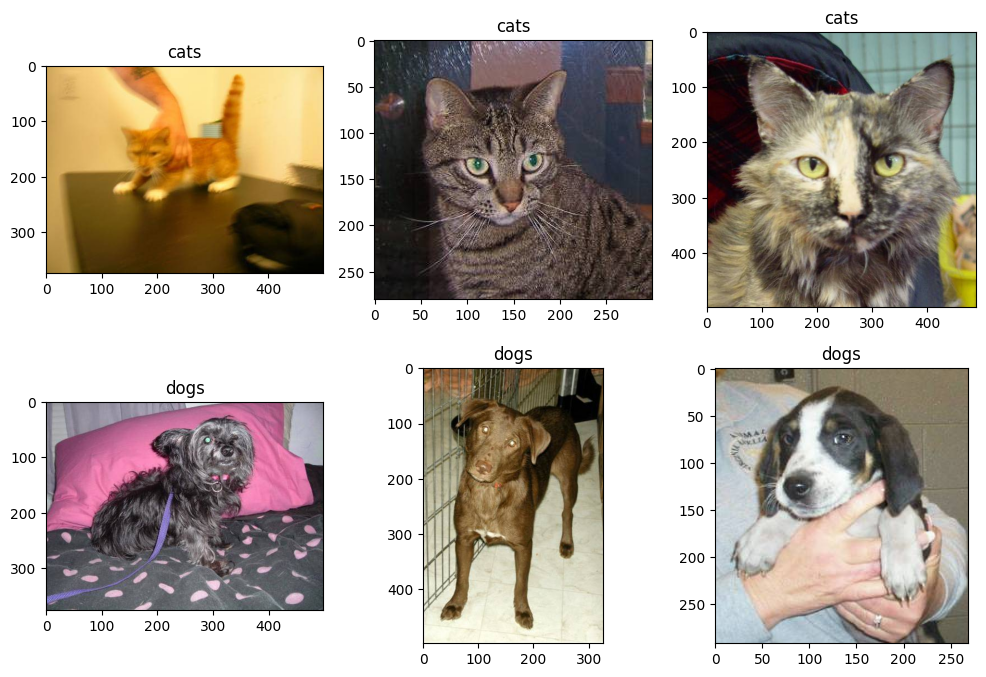

In [8]:
categories = ['cats', 'dogs']
plt.figure(figsize=(10, 10))

i = 0
for label in categories:
    folder_path = os.path.join(train_dir, label)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    for j in range(3):  # Show 3 images per class
        img_path = os.path.join(folder_path, image_files[j])
        img = Image.open(img_path)
        
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(label)        
        i += 1

plt.tight_layout()
plt.show()

### As we see **`02_Processing image data for Deep Learning.ipynb:`**
* Load the image
* Resize the image
* normalize the image
* convert to grayscale
* train the model

#### we load the images and we can see that there is a lot of variation in the images like axis some images have more pixels than others

#### so we need to preprocess the images to make them uniform



### Should I convert images to grayscale?
##### Converting images to grayscale can reduce the model's complexity and training time by using only one color channel instead of three (RGB). This is useful for simple classification tasks where color doesn’t play a key role. However, for problems where color matters (e.g., detecting breeds, using pretrained models), keeping images in RGB is recommended. Grayscale is best suited for lightweight models or when computational efficiency is a priority.

### Preprocessing the images

In [9]:
# define the batch size and image size
# BATCH_SIZE just to telling model how many images to process at a time
# IMG_SIZE just to telling model what size of image to process

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# here just separating the images into training and validation
# this concept called generators
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                  shuffle=True,
                                                                  batch_size=BATCH_SIZE,
                                                                  image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


### train_dataset have a total of 2,000 images, and validation_dataset have 1000 images

### Let's confirm that

In [10]:
total_training_images = 0
for images, labels in train_dataset:
    total_training_images += images.shape[0]

print("Total training images:", total_training_images)

total_validation_images = 0
for images, labels in validation_dataset:
    total_validation_images += images.shape[0]

print("Total validation images:", total_validation_images)



Total training images: 2000
Total validation images: 1000


In [11]:
# just for learning purpose for better understanding

main_dir = os.path.dirname(extracted_path)
train_dir = os.path.join(extracted_path, 'train')
validation_dir = os.path.join(extracted_path, 'validation')

# Get train folder counts
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

train_cat_count = len(os.listdir(train_cats_dir))
train_dog_count = len(os.listdir(train_dogs_dir))

# Get validation folder counts
val_cats_dir = os.path.join(validation_dir, 'cats')
val_dogs_dir = os.path.join(validation_dir, 'dogs')

val_cat_count = len(os.listdir(val_cats_dir))
val_dog_count = len(os.listdir(val_dogs_dir))

# Totals
total_train = train_cat_count + train_dog_count
total_val = val_cat_count + val_dog_count
total_all = total_train + total_val

# Print results
print("Train cats:", train_cat_count)
print("Train dogs:", train_dog_count)
print("Validation cats:", val_cat_count)
print("Validation dogs:", val_dog_count)
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total images in dataset:", total_all)


Train cats: 1000
Train dogs: 1000
Validation cats: 500
Validation dogs: 500
Total training images: 2000
Total validation images: 1000
Total images in dataset: 3000


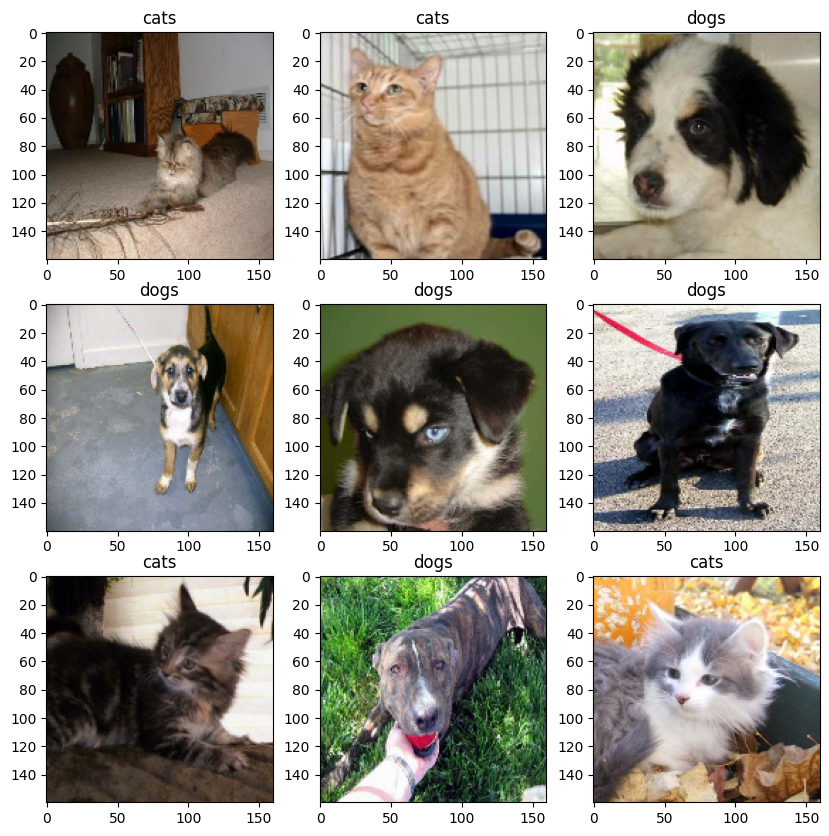

In [12]:
class_names = train_dataset.class_names  # this gives you ['cats', 'dogs']

# Create a figure
plt.figure(figsize=(10, 10))

# Take one batch from the dataset
for images, labels in train_dataset.take(1): # take(1) means take one batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image
        plt.title(class_names[labels[i]])  # Show class label (cat or dog)
        # plt.axis("off")  # Hide axis


### Here we can see that the images are uniform(same size).

In [13]:
# check the type of images
for image, label in train_dataset.take(1):
    print("Image shape:", image[0].shape)
    print("Label shape:", label[0].shape)
    print("Image type:", type(image[0]))
    print("Label type:", type(label[0]))



# covert images into numpy array
for image, label in train_dataset.take(1):
    image = image.numpy()
    label = label.numpy()
    print("Image shape:", image.shape)
    print("Label shape:", label.shape)
    print("Image type:", type(image))
    print("Label type:", type(label))

Image shape: (160, 160, 3)
Label shape: ()
Image type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Label type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Image shape: (32, 160, 160, 3)
Label shape: (32,)
Image type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


### ✅ Why create a test set from validation data?
In many real-world datasets — like the Cats vs Dogs dataset — we have only given:

* A training set

* A validation set

### But during machine learning development, we usually want three sets:

* Training set → to train the model

* Validation set → to tune hyperparameters and monitor overfitting

* Test set → to evaluate the final model’s performance on completely unseen data
### 🧠 So what do we do if there’s no test set?
We split some part of validation into a test set.

That’s exactly what this code does:

Take 20% of validation and use it as the test set.

### 🎯 Why split the validation set, not the training set?
We don't split the training set because we want to use as much data as possible to train the model well.
Training is where the model learns patterns, so more data = better learning.

Instead, we split the validation set, which is already not used for training, into:

A smaller validation set (still used during training to monitor performance)

A new test set (used after training is finished to check real-world performance)

**As the original dataset doesn't contain a test set, you will create one. To do so, determine how many batches of data are available in the validation set using `tf.data.experimental.cardinality`, then move 20% of them to a test set.**

In [14]:
val_batches = tf.data.experimental.cardinality(validation_dataset)


test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

# or we can also use this

# test_dataset = validation_dataset.take(int(0.2 * val_batches))
# validation_dataset = validation_dataset.skip(int(0.2 * val_batches))


### 👇 Why images.shape[0] is used in the code:
images is a batch of images, not just one image.

images.shape[0] gives the number of images in that batch.

#### ✅ For example:

If your BATCH_SIZE = 32, then images.shape[0] will usually be 32 (unless it's the last batch which might be smaller).

This way, you're adding up the total number of images across all batches.

### 🔍 Quick analogy:
If a box has 10 apples and you open 5 boxes:

Looping over boxes and doing += 1 would say "5 apples" (which is wrong).

But Looping over += box.size gives you "10 + 10 + 10 + 10 + 10 = 50 apples" — ✅ accurate!

In [15]:
# Count total training images
train_count = 0
for images, labels in train_dataset:
    train_count += images.shape[0]

# Count validation images (after split)
val_count = 0
for images, labels in validation_dataset:
    val_count += images.shape[0]

# Count test images
test_count = 0
for images, labels in test_dataset:
    test_count += images.shape[0]

# Print all counts
print("📦 Total training images:", train_count)
print("🔎 Total validation images:", val_count)
print("🧪 Total test images:", test_count)
print("🧮 Total images overall:", train_count + val_count + test_count)


📦 Total training images: 2000
🔎 Total validation images: 808
🧪 Total test images: 192
🧮 Total images overall: 3000


In [16]:
# print the nubmer of validation and test batches
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_batches = tf.data.experimental.cardinality(test_dataset)

print("Number of validation batches: %d" % val_batches)
print("Number of test batches: %d" % test_batches)

Number of validation batches: 26
Number of test batches: 6


In [17]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


### Configure the dataset for performance
`prefetch(buffer_size=AUTOTUNE)` improves performance by loading data in the background while the model is training. It helps avoid delays caused by slow disk access or data processing. AUTOTUNE lets TensorFlow decide the best buffer size automatically.

Use buffered prefetching to load images from disk without having I/O become blocking. To learn more about this method see the [data performance](https://www.tensorflow.org/guide/data_performance) guide.

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### Data Augmentation
#### 🎯 Why it's helpful:
`Without augmentation:`
Your model might memorize training images = overfitting 🧠🛑

`With augmentation:`
The model sees more variety in the images = better generalization ✅

**Data augmentation helps increase image variety by applying random transformations like flipping and rotating during training. This reduces overfitting and improves model performance on unseen data.**

In [19]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

This code builds a layer that randomly changes images during training:

🔄 RandomFlip('horizontal'): flips the image left ↔️ right randomly
(like looking at a cat from the other side)

🔁 RandomRotation(0.2): rotates the image a little — up to 20% of 360° (i.e., ~72°)

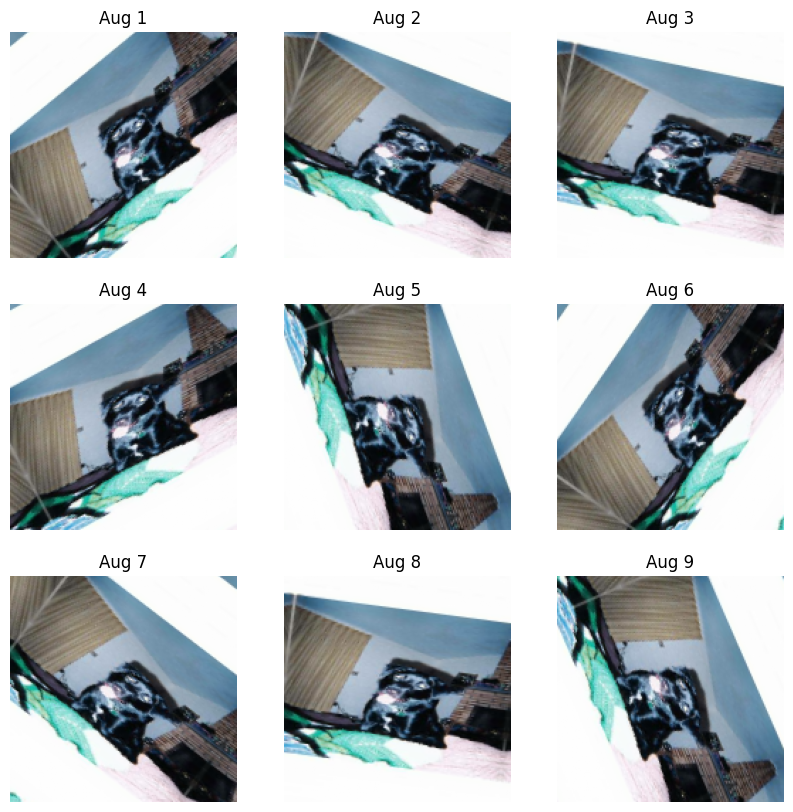

In [20]:
for image, _ in train_dataset.take(1):

  
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.title(f"Aug {i+1}")
    plt.axis('off')

### Rescale pixel values

In a moment, you will download `tf.keras.applications.MobileNetV2` for use as your base model. This model expects pixel values in `[-1, 1]`, but at this point, the pixel values in your images are in `[0, 255]`. To rescale them, use the preprocessing method included with the model.


#### 🧠 How the math works:
Let’s say an original pixel value is:

0 → becomes: (0 × 1/127.5) - 1 = -1

127.5 → becomes: (127.5 × 1/127.5) - 1 = 0

255 → becomes: (255 × 1/127.5) - 1 = +1

✅ So, this transformation maps [0, 255] → [-1, 1] exactly.



#### ✅ What this does:
`rescale = tf.keras.layers.Rescaling(1./255)`

It rescales your pixel values from the range [0, 255] to [0.0, 1.0].

This is very common for training models from scratch or with some pre-trained models that expect normalized input in [0, 1].

In [22]:
# method 1
# only for pretrained model which is MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# method 2
# Note: Alternatively, you could rescale pixel values from `[0, 255]` to `[-1, 1]` 
# using `tf.keras.layers.Rescaling`.

# use this method if you are using custom model
# rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)


# use this method if you are using custom model which expect input in range [0, 1]
# rescale = tf.keras.layers.Rescaling(1./255)

### As discussed in the above steps we 
* load images (complete)
* Resize images (complete)
* normalize images (complete)
* convert images (don't need to do this) discussed above
* train the model (continue)

## Create the base model from the pre-trained convnets
I will create the base model from the **MobileNet V2** model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like `jackfruit` and `syringe`. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, I need to pick which layer of MobileNet V2 I will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, I will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the **include_top=False** argument, I will load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.
### About code cell
#### ✅ input_shape=IMG_SHAPE
You're telling the model what size your images are.

`IMG_SHAPE = IMG_SIZE + (3,)` → if IMG_SIZE = (160, 160), then `IMG_SHAPE = (160, 160, 3)`

That means: 160×160 pixel image with 3 color channels (RGB)
#### ✅ include_top=False
This is super important.

`include_top=True:` includes the original classifier layer (the final Dense(1000) layer for ImageNet)

`include_top=False:` removes the original classifier

We don’t need to predict 1000 classes like “syringe” or “jackfruit”

We want to use the feature extractor only, and then add our own classifier (for cats vs dogs)
#### ✅ weights='imagenet'
This loads the model with pre-trained weights from ImageNet.

So you don't train from scratch, saving time and data.



In [23]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

#### ✅ `next(iter(train_dataset))`
This gets one batch of images from your training dataset.

Think of your dataset as a list of batches. This line does:

image_batch, label_batch = train_dataset[0]
#### ✅ `feature_batch = base_model(image_batch)`
You now pass these images to the base model — which is MobileNetV2 without the top layer.

So:

MobileNetV2 runs all the convolutional layers (feature extractor)

You get features instead of final predictions

`32 `
batch size (32 images)

`5x5`
the reduced spatial dimensions (after many conv & pooling layers)

`1280`
number of feature maps/channels per spatial location

In [24]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


### Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.
#### Freeze the convolutional base
It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's `trainable` flag to False will freeze all of them.

In [25]:
base_model.trainable = False

In [26]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

### Add a classification head
To generate predictions from the block of features, average over the spatial `5x5` spatial locations, using a `tf.keras.layers.GlobalAveragePooling2D` layer to convert the features to  a single 1280-element vector per image.

In [29]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Apply a `tf.keras.layers.Dense` layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a `logit`, or a raw prediction value. Positive numbers predict class 1, negative numbers predict class 0.

In [30]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [31]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [32]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

The 8+ million parameters in MobileNet are frozen, but there are 1.2 thousand _trainable_ parameters in the Dense layer. These are divided between two `tf.Variable` objects, the weights and biases.

In [33]:
len(model.trainable_variables)

2

In [ ]:
# tf.keras.utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


#### Compile the model

Compile the model before training it. Since there are two classes, use the `tf.keras.losses.BinaryCrossentropy` loss with `from_logits=True` since the model provides a linear output.

In [35]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

#### Train the model

After training for 10 epochs, you should see ~96% accuracy on the validation set.


In [36]:
%%time
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 472ms/step - accuracy: 0.6621 - loss: 0.6125
CPU times: total: 31.3 s
Wall time: 16.4 s


In [37]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.62
initial accuracy: 0.67


In [38]:
%%time
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset, verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 705ms/step - accuracy: 0.6567 - loss: 0.6272 - val_accuracy: 0.8193 - val_loss: 0.4324
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 54s 860ms/step - accuracy: 0.7845 - loss: 0.4746 - val_accuracy: 0.8936 - val_loss: 0.3309
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 812ms/step - accuracy: 0.8457 - loss: 0.3867 - val_accuracy: 0.9245 - val_loss: 0.2646
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 817ms/step - accuracy: 0.8895 - loss: 0.3172 - val_accuracy: 0.9369 - val_loss: 0.2217
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 823ms/step - accuracy: 0.8956 - loss: 0.2825 - val_accuracy: 0.9493 - val_loss: 0.1892
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 813ms/step - accuracy: 0.9029 - loss: 0.2609 - val_accuracy: 0.9592 - val_loss: 0.1663
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 88s 908ms/step - accuracy: 0.9182 - loss: 0.2486 - val_accuracy: 0.9604 - val_loss: 0.1544
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 801ms/step - accuracy: 0.9142 - loss: 0.2339 - val_accu

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNetV2 base model as a fixed feature extractor.

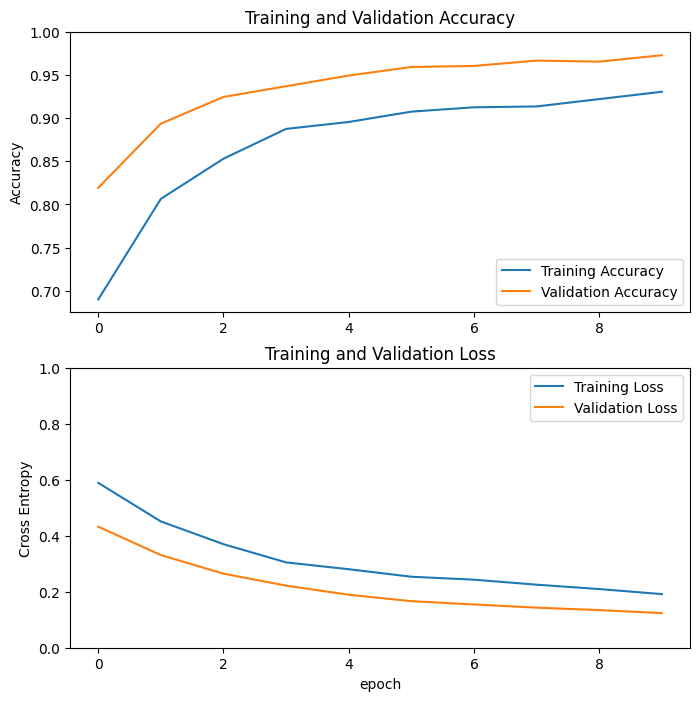

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [40]:
# print final training and validation accuracy
loss, accuracy = model.evaluate(train_dataset)
print("Training accuracy: {:.2f}".format(accuracy))

loss, accuracy = model.evaluate(validation_dataset)
print("Validation accuracy: {:.2f}".format(accuracy))

63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 495ms/step - accuracy: 0.9726 - loss: 0.1148
Training accuracy: 0.97
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 429ms/step - accuracy: 0.9716 - loss: 0.1210
Validation accuracy: 0.97


### Fine tuning
In the feature extraction experiment, you were only training a few layers on top of an MobileNetV2 base model. The weights of the pre-trained network were **not** updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

Note: This should only be attempted after you have trained the top-level classifier with the pre-trained model set to non-trainable. If you add a randomly initialized classifier on top of a pre-trained model and attempt to train all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier) and your pre-trained model will forget what it has learned.

Also, you should try to fine-tune a small number of top layers rather than the whole MobileNet model. In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.


#### Un-freeze the top layers of the model
All you need to do is unfreeze the `base_model` and set the bottom layers to be un-trainable. Then, you should recompile the model (necessary for these changes to take effect), and resume training.


In [41]:
base_model.trainable = True

In [42]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [43]:
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

### Compile the model

As you are training a much larger model and want to readapt the pretrained weights, it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

In [44]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [45]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,862,721 (7.11 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [46]:
len(model.trainable_variables)

56

#### Continue training the model
If you trained to convergence earlier, this step will improve your accuracy by a few percentage points.

In [47]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset, verbose=1)

Epoch 10/20


63/63 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7769 - loss: 0.4518 - val_accuracy: 0.9728 - val_loss: 0.0852
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 966ms/step - accuracy: 0.8800 - loss: 0.2852 - val_accuracy: 0.9765 - val_loss: 0.0726
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9036 - loss: 0.2413 - val_accuracy: 0.9777 - val_loss: 0.0642
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9232 - loss: 0.1913 - val_accuracy: 0.9802 - val_loss: 0.0588
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9330 - loss: 0.1576 - val_accuracy: 0.9827 - val_loss: 0.0519
Epoch 15/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9399 - loss: 0.1446 - val_accuracy: 0.9864 - val_loss: 0.0478
Epoch 16/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9441 - loss: 0.1379 - val_accuracy: 0.9851 - val_loss: 0.0458
Epoch 17/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9294 - loss: 0.1503 - val_accuracy: 0.9839 - val_loss: 

Let's take a look at the learning curves of the training and validation accuracy/loss when fine-tuning the last few layers of the MobileNetV2 base model and training the classifier on top of it. The validation loss is much higher than the training loss, so you may get some overfitting.

You may also get some overfitting as the new training set is relatively small and similar to the original MobileNetV2 datasets.

After fine tuning the model nearly reaches 98% accuracy on the validation set.

In [48]:
# Initialize the variables as lists
acc = []
val_acc = []
loss = []
val_loss = []

# Add the history data
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']
loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

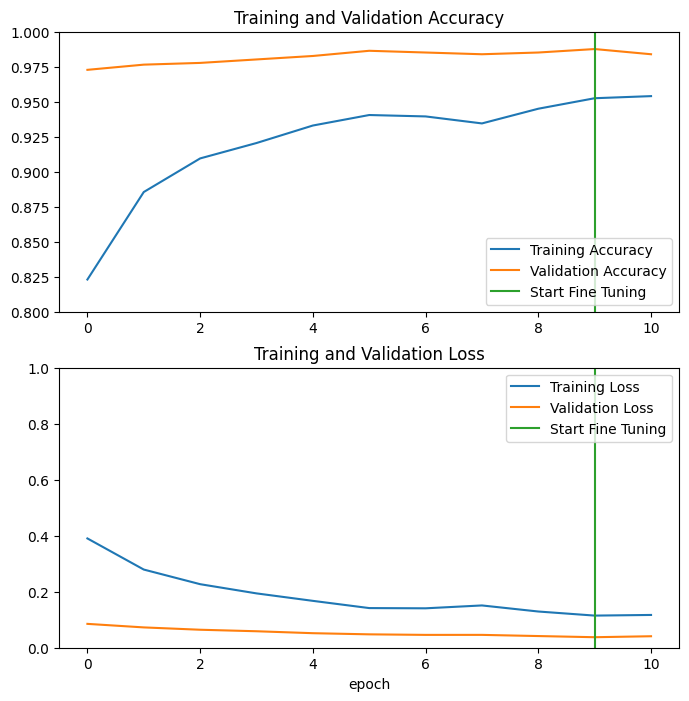

In [49]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [50]:
# print the training and validation accuracies of the fine-tuned model
loss, accuracy = model.evaluate(train_dataset)
print("Training accuracy: {:.2f}".format(accuracy))

loss, accuracy = model.evaluate(validation_dataset)
print("Validation accuracy: {:.2f}".format(accuracy))

63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 507ms/step - accuracy: 0.9918 - loss: 0.0263
Training accuracy: 0.99
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 477ms/step - accuracy: 0.9869 - loss: 0.0413
Validation accuracy: 0.99


#### Evaluation and prediction
Finally you can verify the performance of the model on new data using test set.

In [51]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - accuracy: 0.9893 - loss: 0.0347
Test accuracy : 0.9895833134651184


And now you are all set to use this model to predict if your pet is a cat or dog.

Predictions:
 [1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1]
Labels:
 [1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1]


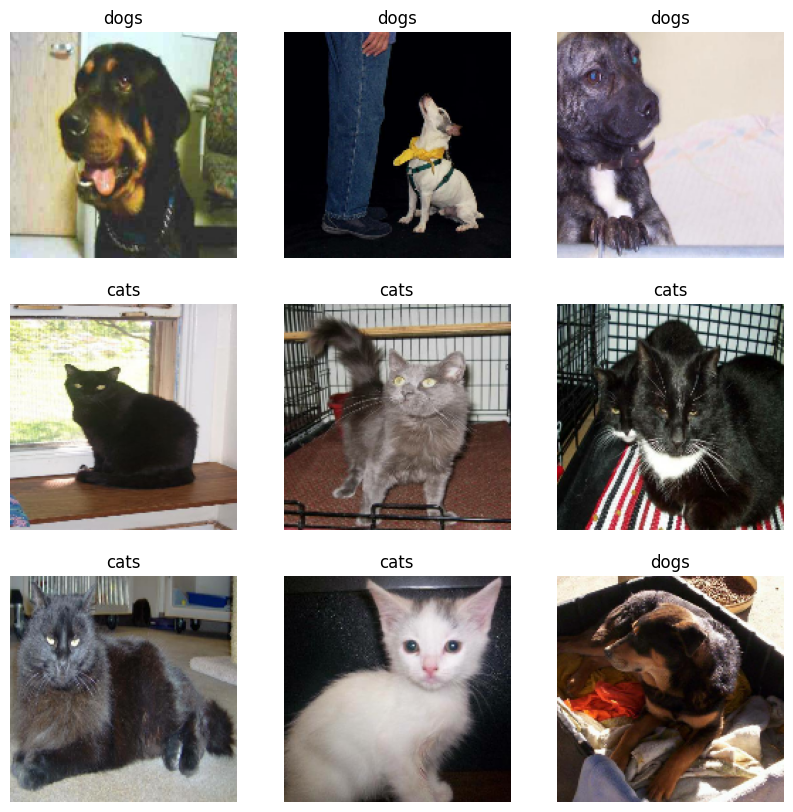

In [52]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")